<div dir="rtl">
    <h1>
        خوشه‌بندی کاربران در شبکه‌های اجتماعی
    </h1>
</div>

<div dir="rtl">
    هدف از این پروژه، جدا کردن و گروه‌بندی رئوس یک گراف همبند به صورت خوشه‌هایی است که بیشترین ارتباط را با هم دارند.
    برای مثال، ارتباط دوستی در یک شبکه‌ی اجتماعی را به صورت یال‌های بدون جهت بین کاربران در نظر بگیرید.
    می‌خواهیم کاربرانی که با هم بیشترین ارتباط را داشته و اجتماع‌های کوچک را تشکیل می‌دهند، پیدا کنیم.
    مثلا در گراف زیر، قرار است راس‌های ۱ تا ۴ در یک دسته و راس‌های ۵ تا ۹ در دسته‌ی دیگر قرار گیرند.
    </br>
    در این پروژه، ابتدا با دنبال کردن مراحل، قدم به قدم گراف زیر را خوشه‌بندی می‌کنید، سپس خودتان مراحل را روی گراف شامل ۳۵۱ فرد اجرا می‌کنید تا خوشه‌هایشان مشخص شود. 
</div>

![Graph](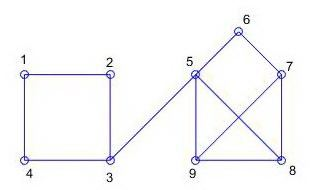
)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
adj = np.array([
    [0,1,0,1,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0],
    [0,1,0,1,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,1,1],
    [0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,1,0,1,1],
    [0,0,0,0,1,0,1,0,1],
    [0,0,0,0,1,0,1,1,0]
])
print(adj.shape)

(9, 9)


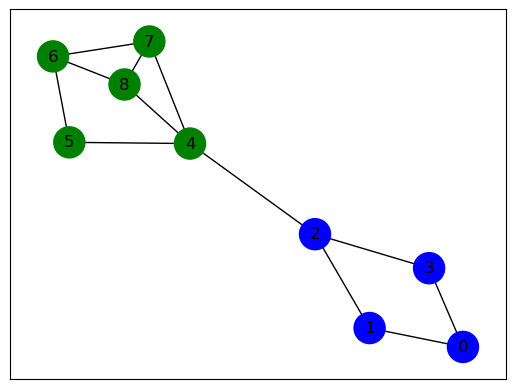

In [3]:

def show_graph(adjacency_matrix, labels=None):
    color_map = {1: 'blue', 2: 'green', 3: 'red', 4: 'yellow'}
    colors = [color_map[x] for x in labels] if labels is not None else None
        
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw_networkx(gr, node_size=500, node_color=colors)
    plt.show()

    
show_graph(adj, [1, 1, 1, 1, 2, 2, 2, 2, 2])
#\show_graph(adj)

<div dir="rtl">
    می‌توانید از تابع show_graph برای نمایش گراف خود استفاده کنید.
    ورودی اول این تابع ماتریس مجاورت بوده و ورودی دوم آن در صورت داده شدن، باید به صورت یک لیست از اعداد ۱ تا ۴ باشد.
    بعد از خوشه‌بندی می‌توانید شماره‌ی خوشه‌ی متناظر با هر راس را در این لیست قرار دهید تا رنگ آن‌ها مشخص باشند.
</div>

<div dir="rtl">
    <h2>
        گراف تمرینی
    </h2>
</div>

<div dir="rtl">
    ابتدا ماتریس مجاورت گراف را به شکل یک ماتریس در numpy تعریف کنید.
    در این ماتریس، اگر بین دو راس i و j یال وجود داشته باشد،
    درایه‌ی i,j یک خواهد بود.
    بنابراین به دلیل بدون جهت بودن گراف، ماتریس متقارن خواهد بود.
</div>

In [4]:

adj = np.array([
    [0,1,0,1,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0],
    [0,1,0,1,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,1,1],
    [0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,1,0,1,1],
    [0,0,0,0,1,0,1,0,1],
    [0,0,0,0,1,0,1,1,0]
])

<div dir="rtl">
    در این مرحله، ابتدا جمع سطرها را محاسبه کرده و در بردار Sum ذخیره کنید.
    سپس ماتریس لاپلاسین را به صورت
    $
    Lapl = diag(Sum) - Adj
    $
    محاسبه کنید.
    منظور از
    $diag(x)$
    ماتریس قطری‌ای است که درایه‌های
    $x$
    روی قطر اصلی آن قرار گرفته و بقیه‌ی درایه‌های آن صفر هستند.
    هدف از محاسبه‌ی این ماتریس این است که با حفظ ویژگی‌های ماتریس مجاورت، جمع سطرها و ستون‌های آن نیز صفر شوند.
</div>

In [5]:
# Your code
sum1=[np.sum(row) for row in adj]
lapl=np.diag(sum1)-adj
print(lapl)

[[ 2 -1  0 -1  0  0  0  0  0]
 [-1  2 -1  0  0  0  0  0  0]
 [ 0 -1  3 -1 -1  0  0  0  0]
 [-1  0 -1  2  0  0  0  0  0]
 [ 0  0 -1  0  4 -1  0 -1 -1]
 [ 0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0 -1  0 -1  3 -1]
 [ 0  0  0  0 -1  0 -1 -1  3]]


<div dir="rtl">
    حال باید مقدار ویژه و بردار ویژه‌های ماتریس را استخراج کنید.
    همچنین باید این مقادیر ویژه و بردار ویژه‌های متناظرشان، از کوچک به بزرگ مرتب شده باشند.
</div>

In [6]:
# Your code
from numpy.linalg import eigh
vals, vecs = eigh(lapl)

for i in vals:
    print(round(i,2))
print(vecs[:,1])
print(np.dot(lapl,vecs[:,1]))
print(vals[1]*vecs[:,1])

-0.0
0.28
2.0
2.0
2.28
3.43
4.0
4.33
5.67
[-0.45554203 -0.39169563 -0.21805319 -0.39169563  0.19035409  0.30870383
  0.34052092  0.30870383  0.30870383]
[-0.1276928  -0.10979604 -0.0611224  -0.10979604  0.05335808  0.08653264
  0.09545128  0.08653264  0.08653264]
[-0.1276928  -0.10979604 -0.0611224  -0.10979604  0.05335808  0.08653264
  0.09545128  0.08653264  0.08653264]


<div dir="rtl">
    چون جمع سطرهای ماتریس لاپلاسین صفر بود، ماتریس تکین بوده و یک مقدار ویژه‌ی صفر خواهد داشت.
    همچنین ماتریس مثبت نیمه معین است و همه‌ی مقادیر ویژه نامنفی هستند.
    بنابراین کوچک‌ترین مقدار ویژه صفر بوده و مقدار ويژه‌ی بعدی مثبت خواهد بود.
    بردار ویژه‌ی متناظر با این مقدار ویژه را در نظر بگیرید.
    این بردار ویژه متناظر با کمترین واریانس است.
    (برای اطلاعات بیشتر در مورد PCA مطالعه کنید.)
    بنابراین مناسب‌ترین معیار برای خوشه‌بندی است.
    </br>
    راس‌هایی که درایه‌ی متناظرشان در این بردار ویژه مثبت است را در یک خوشه و راس‌هایی که منفی است را در خوشه‌ی دیگر در نظر بگیرید.
    با بررسی خروجی می‌توانید تبدیل شدن گراف اولیه به دو خوشه‌ی گفته شده در ابتدای پروژه را مشاهده کنید.
</div>

In [7]:
# Your code
cluster1=np.zeros((1,9))
print(cluster1)
for i in range(0,9):
    sign1=np.sign(vecs[i,1])
    print(sign1)
    if sign1<=0:
        cluster1[0,i]=1
    else:
        cluster1[0,i]=2
        
print(cluster1)



[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
[[1. 1. 1. 1. 2. 2. 2. 2. 2.]]


<div dir="rtl">
    گراف را با خوشه‌هایی که بدست آوردید توسط تابع show_graph نمایش دهید.
</div>

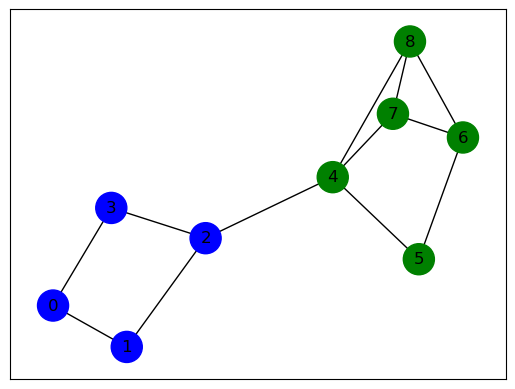

In [8]:
# Your code
show_graph(adj, cluster1[0,:])

<div dir="rtl">
    برای داشتن تعداد بیشتری خوشه، می‌توان بردار ویژه‌های بیشتری در نظر گرفت.
    برای مثال، برای داشتن ۴ خوشه می‌توانید بردار ویژه‌ی متناظر با ۲ کوچک‌ترین مقدار ویژه‌های مثبت را در نظر بگیرید.
    حال به ازای هر راس، دو درایه در این دو بردار ویژه داریم.
    می‌توانید ۴ خوشه را به صورت زیر در نظر بگیرید:
    <ul>
        <li>$(+,+)$</li>
        <li>$(+,-)$</li>
        <li>$(-,+)$</li>
        <li>$(-,-)$</li>
    </ul>
    با انجام این خوشه‌بندی روی گراف اولیه، می‌توانید مشاهده کنید خوشه‌بندی مناسب نبوده و همان دو خوشه‌ی اولیه دقیق‌تر بودند.
</div>

In [9]:
# Your code
cluster2=np.zeros((2,9))

for i in range(0,9):
    sign1=np.sign(vecs[i,1])
    if sign1<=0:
        cluster2[0,i]=1
    else:
        cluster2[0,i]=2


for i in range(0,9):
    sign1=np.sign(vecs[i,2])
    if sign1<=0:
        cluster2[1,i]=1
    else:
        cluster2[1,i]=2
print(cluster2)
cluster2_result=np.zeros((1,9))
for i in range(0,9):
    if cluster2[0,i]==1 and cluster2[1,i]==1:
        cluster2_result[0,i]=1
        
    elif cluster2[0,i]==1 and cluster2[1,i]==2:
        cluster2_result[0,i]=2
    elif cluster2[0,i]==2 and cluster2[1,i]==1:
        cluster2_result[0,i]=3
    else:
        cluster2_result[0,i]=4
print(cluster2_result[0,:])

[[1. 1. 1. 1. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 1. 1.]]
[1. 1. 2. 2. 4. 4. 4. 3. 3.]


<div dir="rtl">
    گراف را با خوشه‌هایی که بدست آوردید توسط تابع show_graph نمایش دهید.
</div>

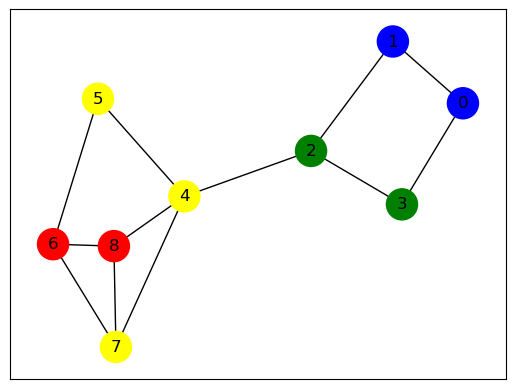

In [10]:
# Your code
show_graph(adj, cluster2_result[0,:])

<div dir="rtl">
    <h2>
        گراف اصلی
    </h2>
</div>

<div dir="rtl">
    اگر چه در گراف تمرینی خوشه‌بندی با چشم هم قابل مشاهده بود، در گراف با رئوس بیشتر این کار به صورت چشمی ممکن نیست.
    در این قسمت، مراحل بالا را روی گراف اصلی اجرا کنید و خوشه‌بندی با ۲ و ۴ خوشه را بدست آورید.
</div>

In [11]:
adj_final = np.zeros((100, 100))
file1 = open('data.txt', 'r')
lines = file1.readlines()
print(len(lines))

for l in lines[1:]:
    #print(l)
    i, j = l.split()
    adj_final[int(i) - 1, int(j) - 1] = 1
    adj_final[int(j) - 1, int(i) - 1] = 1

772


In [12]:
# Your code
sum1=[np.sum(row) for row in adj_final]
lapl=np.diag(sum1)-adj_final
from numpy.linalg import eigh
vals, vecs = eigh(lapl)

for i in vals:
    print(round(i,5))
cluster1=np.zeros((1,100))

for i in range(0,100):
    sign1=np.sign(vecs[i,1])
    if sign1<=0:
        cluster1[0,i]=1
    else:
        cluster1[0,i]=2
      
print(cluster1)

-0.0
0.4961
0.75912
0.98306
1.34687
8.03712
8.20386
8.38066
8.49409
8.72534
8.8048
9.32746
9.41981
9.45124
9.58766
9.60505
9.65065
9.77308
9.80647
10.01923
10.53302
10.79512
10.9552
11.0
11.0
11.06779
11.19259
11.51879
11.55498
11.74947
11.87536
11.94164
12.04022
12.06505
12.09923
12.15298
12.31743
12.40163
12.51508
12.59886
12.75726
12.89718
12.92818
13.28718
13.3665
13.51331
13.57228
13.68063
13.84903
14.15684
14.66281
14.80844
14.8428
15.08697
15.26502
15.45961
15.49852
15.64963
15.79675
15.92462
16.11658
16.23109
16.48204
16.58046
16.7966
16.9106
17.00283
17.16187
17.28216
17.38747
17.7288
18.13695
18.60779
18.68502
18.91169
19.17076
19.97692
20.18308
20.32879
21.11012
21.40592
22.3995
23.03128
23.25358
23.68292
23.78095
24.01319
24.38394
24.70043
25.59107
26.16715
26.28766
26.61554
27.17435
27.5074
29.10841
29.28173
30.11824
30.26185
31.1936
[[2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2.
  2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [13]:
cluster2=np.zeros((2,100))

for i in range(0,100):
    sign1=np.sign(vecs[i,1])
    if sign1<=0:
        cluster2[0,i]=1
    else:
        cluster2[0,i]=2


for i in range(0,100):
    sign1=np.sign(vecs[i,2])
    if sign1<=0:
        cluster2[1,i]=1
    else:
        cluster2[1,i]=2

cluster2_result=np.zeros((1,100))
for i in range(0,100):
    if cluster2[0,i]==1 and cluster2[1,i]==1:
        cluster2_result[0,i]=1
        
    elif cluster2[0,i]==1 and cluster2[1,i]==2:
        cluster2_result[0,i]=2
    elif cluster2[0,i]==2 and cluster2[1,i]==1:
        cluster2_result[0,i]=3
    else:
        cluster2_result[0,i]=4

print(cluster2_result)

[[3. 3. 2. 1. 1. 1. 1. 1. 1. 3. 2. 3. 1. 1. 1. 3. 1. 1. 4. 1. 3. 1. 1. 3.
  3. 3. 2. 1. 1. 1. 3. 1. 1. 2. 1. 1. 3. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2.
  1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]


In [14]:
def show_graph1(adjacency_matrix, labels=None):
    color_map = {1: 'blue', 2: 'green', 3: 'red', 4: 'yellow', 5:'purple'}
    colors = [color_map[x] for x in labels] if labels is not None else None
        
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw_networkx(gr, node_size=150, node_color=colors)
    plt.show()

<div dir="rtl">
    گراف‌هایی که با ۲ و ۴ خوشه، خوشه‌بندی کردید را توسط تابع show_graph نمایش دهید.
</div>

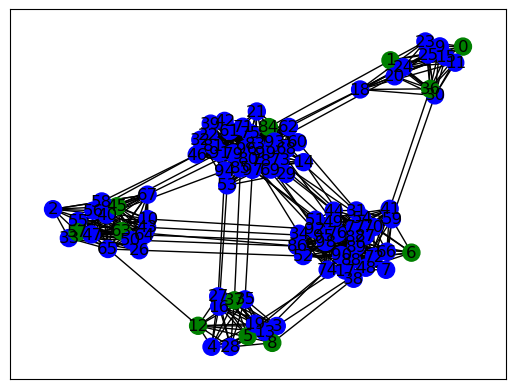

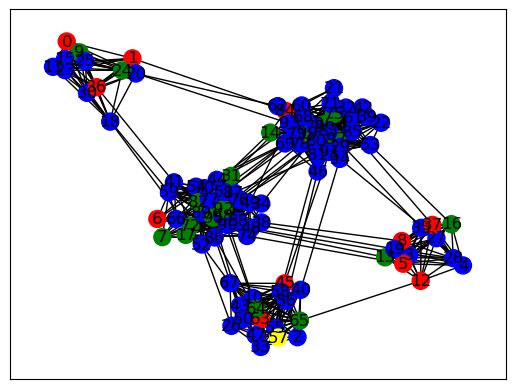

In [15]:
show_graph1(adj_final, cluster1[0,:])    
show_graph1(adj_final, cluster2_result[0,:])

در این قسمت نتایج با استفاده از الگوریتم
K-means
مقایسه شده است 

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(vecs[:,1:2])

C:\Users\razie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\razie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [17]:
colors = kmeans.labels_
 
# using enumerate() + list comprehension
# to return true indices.
test_list = colors==0
res = [i for i, val in enumerate(test_list) if val]
 
# printing result
print("The list indices having True values are : " + str(res))
print("Clusters by first metohd:", cluster2_result)
print("Clusters by Kmeans:", colors)

The list indices having True values are : [3, 4, 5, 8, 12, 13, 16, 19, 27, 28, 35, 37]
Clusters by first metohd: [[3. 3. 2. 1. 1. 1. 1. 1. 1. 3. 2. 3. 1. 1. 1. 3. 1. 1. 4. 1. 3. 1. 1. 3.
  3. 3. 2. 1. 1. 1. 3. 1. 1. 2. 1. 1. 3. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2.
  1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]
Clusters by Kmeans: [1 1 3 0 0 0 3 3 0 1 3 1 0 0 2 1 0 3 1 0 1 2 2 1 1 1 3 0 0 2 1 3 2 3 3 0 1
 0 3 2 3 2 2 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 2 2 2 2 3 3 3 3 2 2 2 3 2 3 2
 3 2 3 3 2 2 2 2 3 2 2 2 3 3 3 3 3 2 3 2 2 3 2 2 3 2]


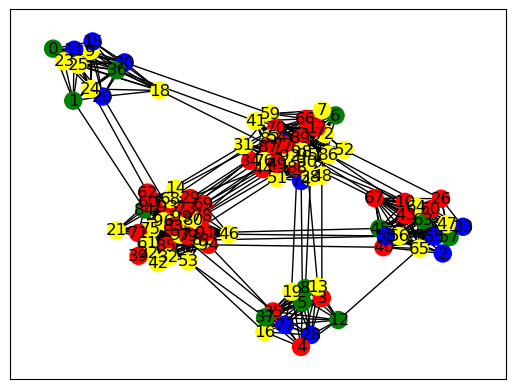

In [18]:
colors=colors+1
show_graph1(adj_final, colors)